In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the heart disease dataset
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Separate features (x) and target variable (y)
x = heart_data.drop(columns='target', axis = 1)
y = heart_data['target']
y.value_counts()

1    526
0    499
Name: target, dtype: int64

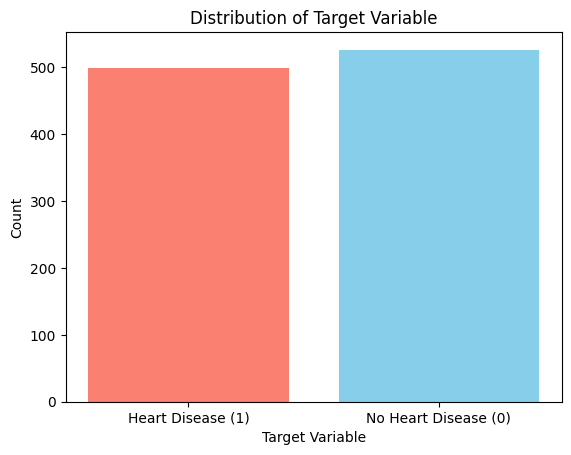

In [4]:
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable
target_counts = y.value_counts()

# Plotting the bar chart
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(target_counts.index, ['No Heart Disease (0)', 'Heart Disease (1)'])

# Display the plot
plt.show()


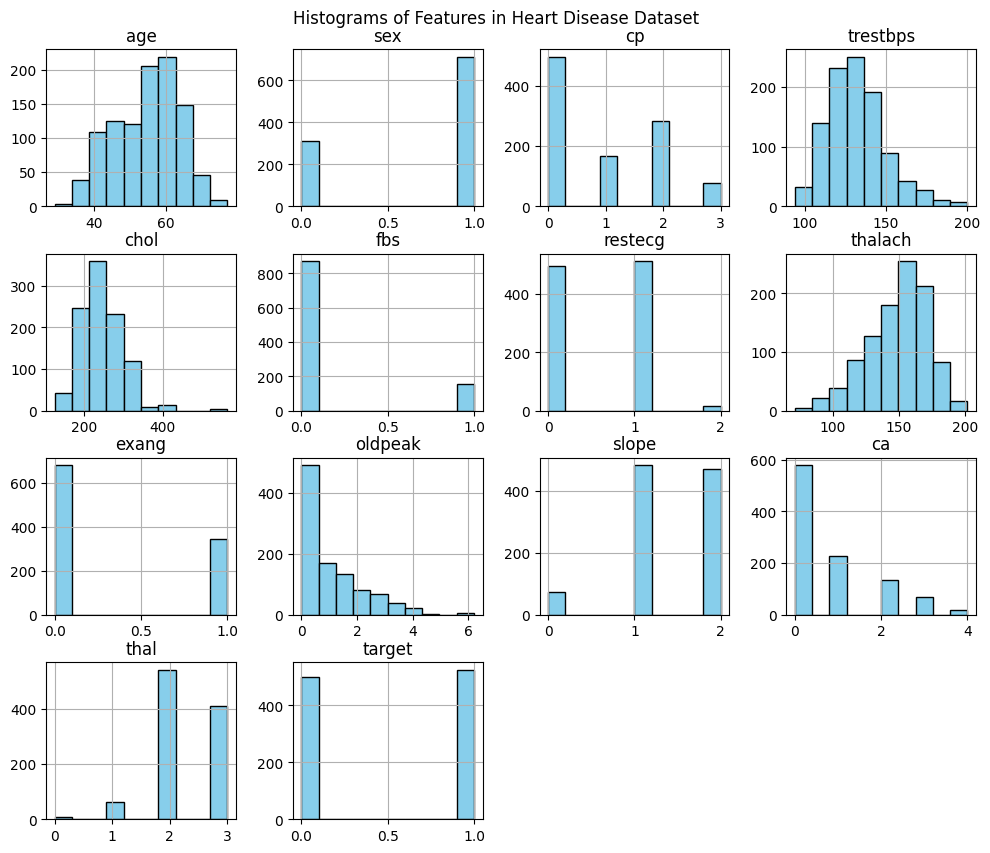

In [5]:
import matplotlib.pyplot as plt

# Assuming 'heart_data' is your entire dataset
heart_data.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features in Heart Disease Dataset", y=0.92)
plt.show()


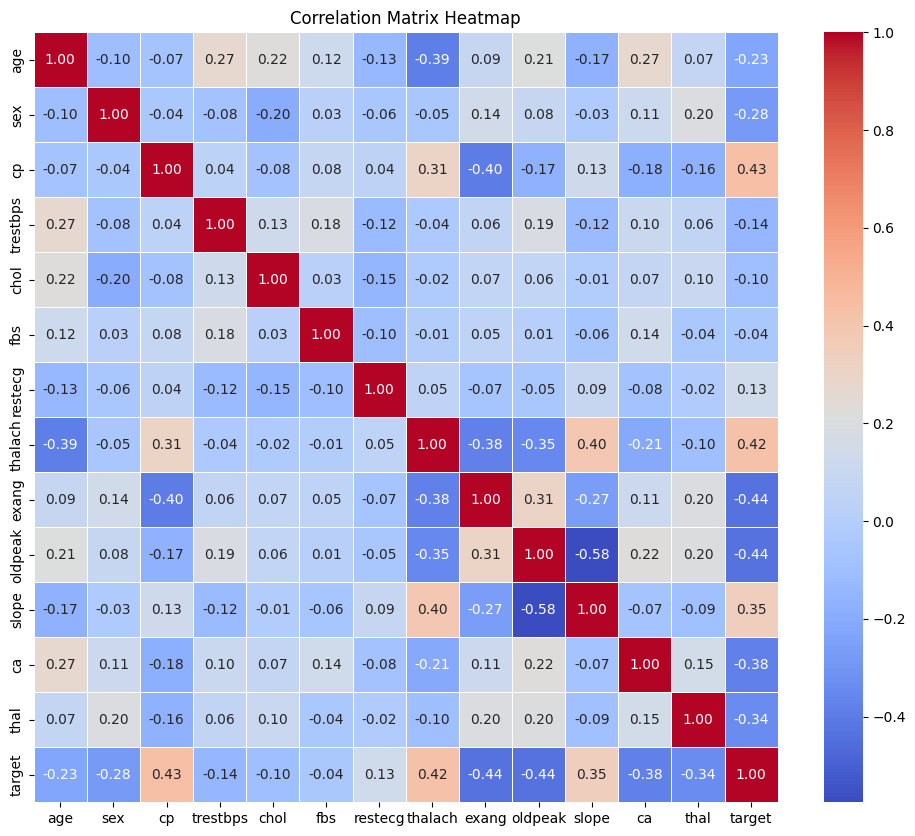

In [6]:
import seaborn as sns

# Assuming 'heart_data' is your entire dataset
correlation_matrix = heart_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


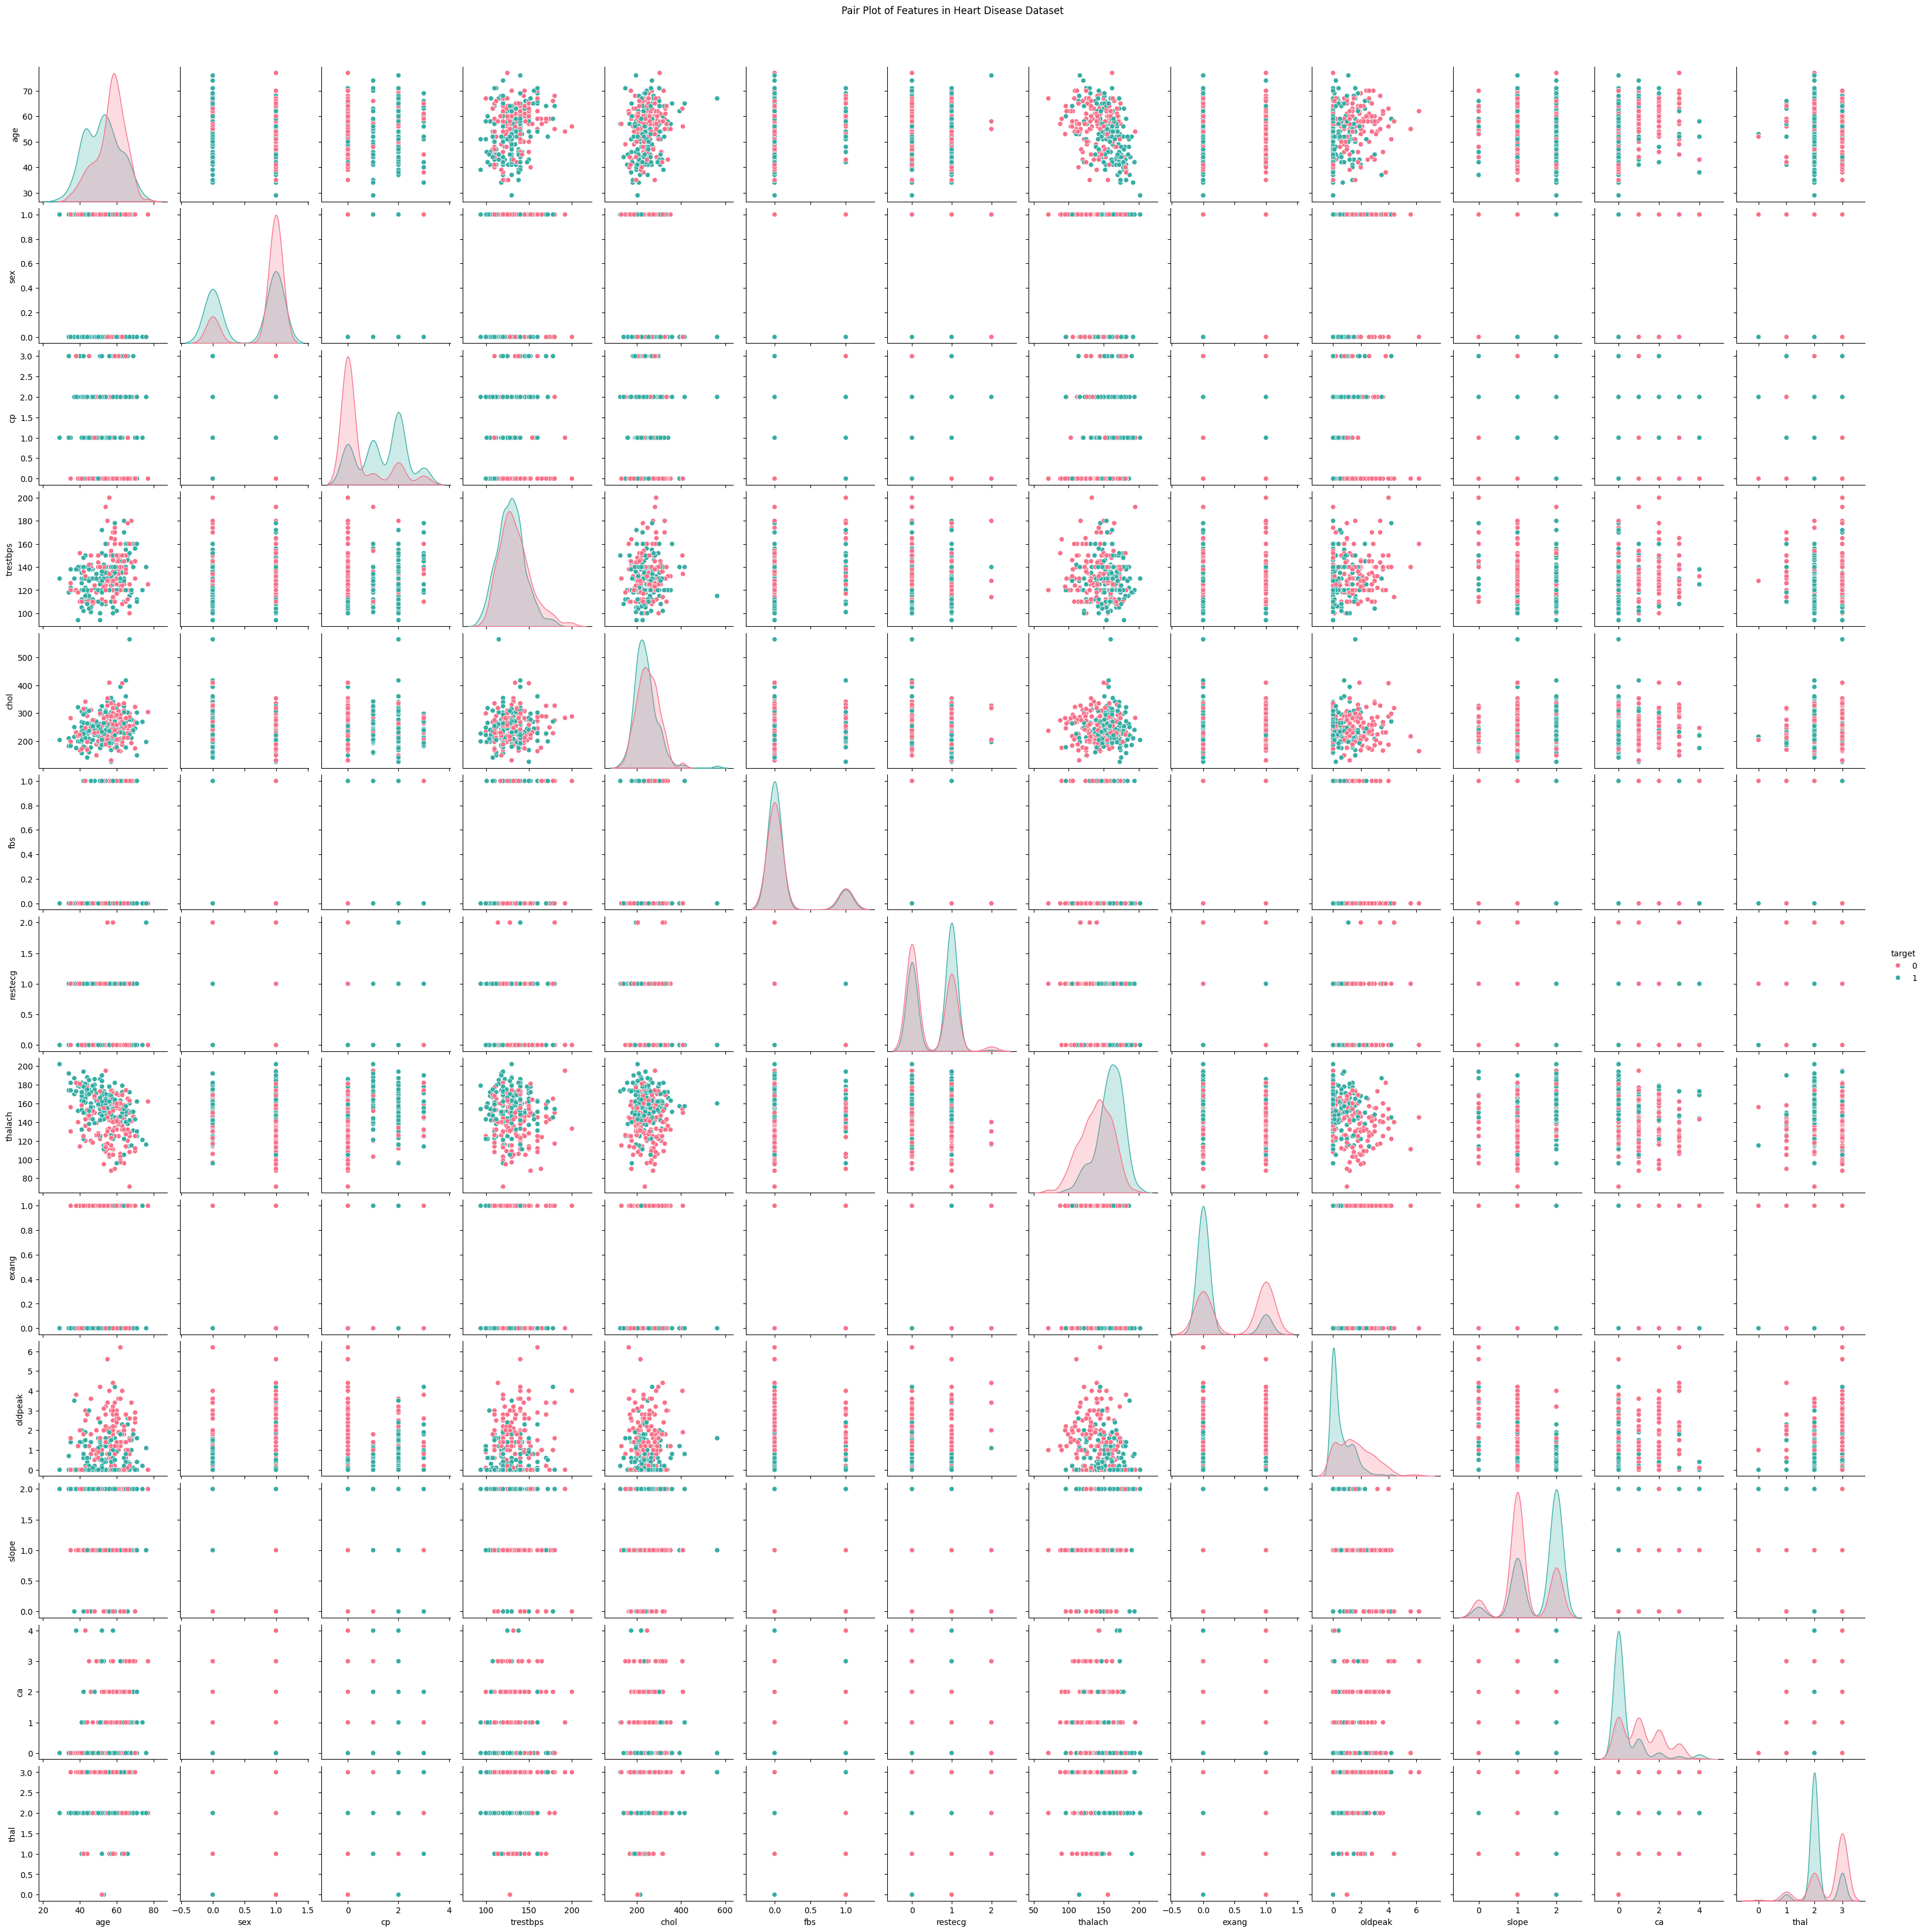

In [7]:
# Assuming 'heart_data' is your entire dataset
sns.pairplot(heart_data, hue='target', palette='husl')
plt.suptitle('Pair Plot of Features in Heart Disease Dataset', y=1.02)
plt.show()


<ipython-input-8-993689ad1b22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=heart_data, palette='Set3')
<ipython-input-8-993689ad1b22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=heart_data, palette='Set3')
<ipython-input-8-993689ad1b22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=heart_data, palette='Set3')
<ipython-input-8-993689ad1b22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

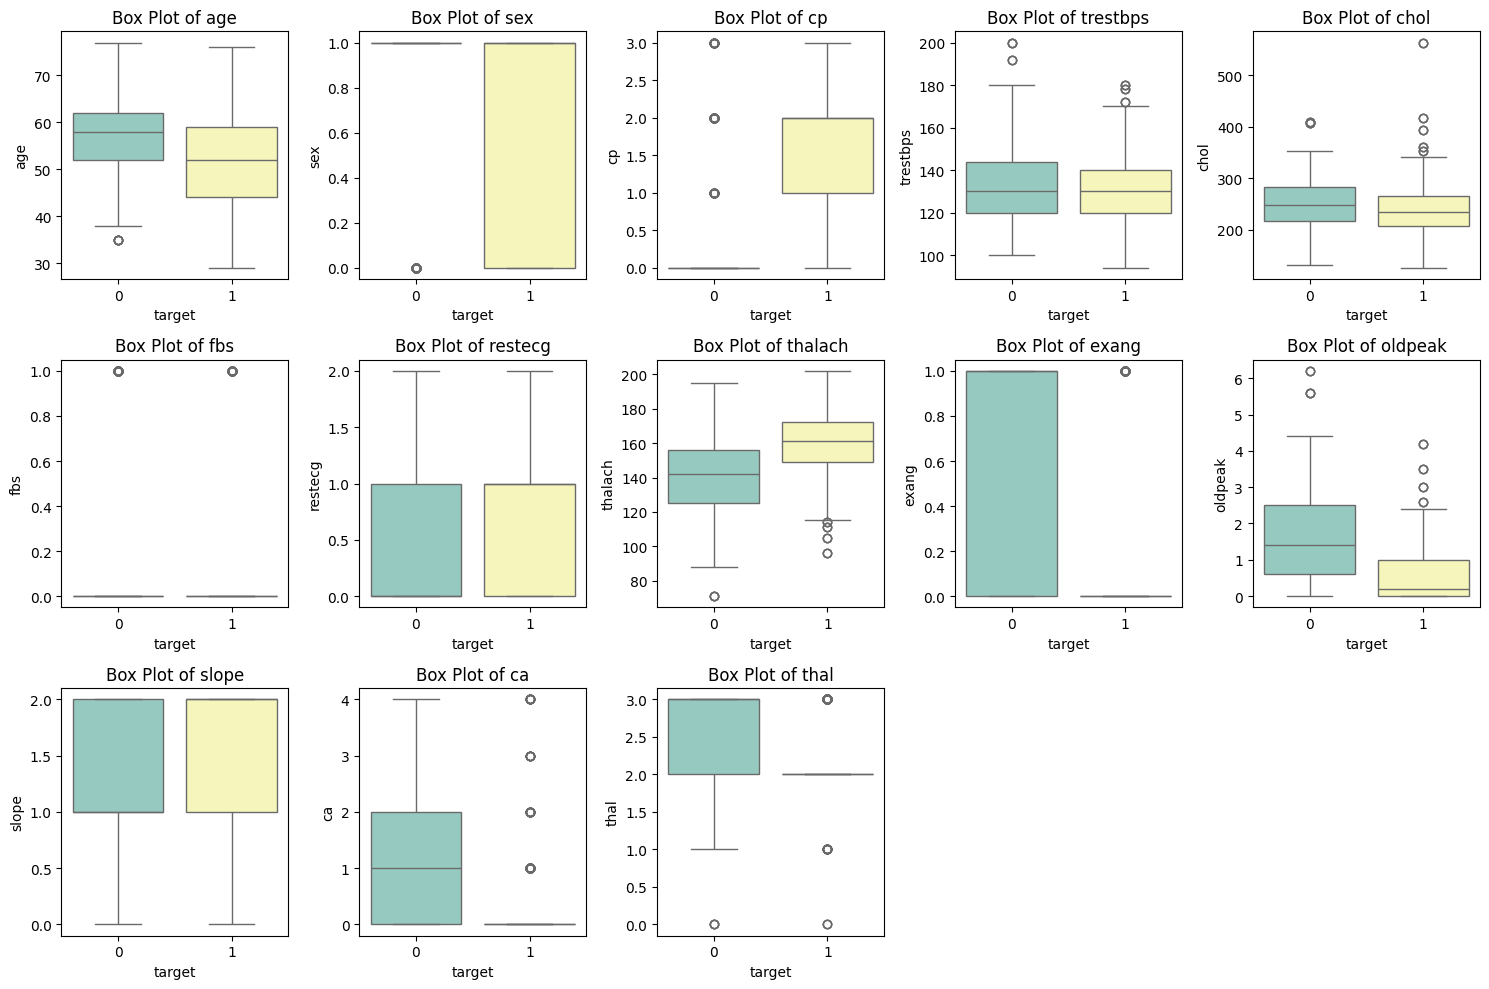

In [8]:
# Assuming 'heart_data' is your entire dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(heart_data.columns[:-1]):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x='target', y=column, data=heart_data, palette='Set3')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


In [9]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=2)

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

# Create instances of individual models
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()

# Create a list of tuples where each tuple contains a name for the model and the model itself
models = [
    ('Logistic Regression', model_lr),
    ('Decision Tree', model_dt),
    ('Random Forest', model_rf),
    ('Support Vector Machine', model_svm),
    ('K-Nearest Neighbors', model_knn),
    ('Naive Bayes', model_nb)
]

# Create a Voting Classifier
# model = VotingClassifier(estimators=models, voting='hard')
model = RandomForestClassifier()





In [11]:
# Train the model on the training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
# Predictions on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [13]:
# Predictions on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [14]:
# Display the accuracy of the model on both training and test data
print("Accuracy of training data: ", training_data_accuracy)
print("Accuracy of test data: ", test_data_accuracy)

Accuracy of training data:  1.0
Accuracy of test data:  0.9780487804878049


In [15]:
# Input new data for prediction
input_data = (59, 1, 0, 140, 298, 0, 1, 122, 1, 4.2, 1, 3, 3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


In [16]:
# Make a prediction on the new input data
prediction = model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
# Display the prediction result
if prediction[0] == 0:
    print("The person does not have a heart disease")
else:
    print("The person does have a heart disease")

The person does not have a heart disease
